In [1]:
#Working with Simple Linear Regression
#Risk analysis of space shuttle

In [1]:
#Import data into Python
import os
os.getcwd()

'C:\\Users\\AbhilashMandadhi\\Desktop\\Data Sets'

In [2]:
#os.chdir("C:/Users/Mohan/Desktop/Data Sets")

In [3]:
os.getcwd()


'C:\\Users\\AbhilashMandadhi\\Desktop\\Data Sets'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
challenger=pd.read_csv('challenger.csv')

In [7]:
challenger

,o_ring_ct,O_ring_failures,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [8]:
#Assign ring failure values to an object
O_ring_failures=challenger['O_ring_failures']

In [9]:
O_ring_failures

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    2
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
Name: O_ring_failures, dtype: int64

In [10]:
#Assign temperature values to 'temp' object

In [11]:
temp=challenger['temperature']

Text(0.5, 0, 'Temperature')

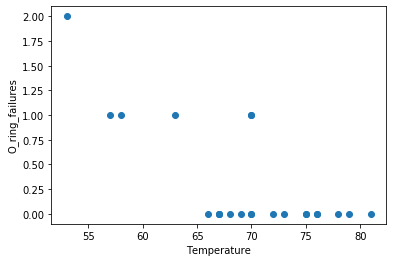

In [12]:
%matplotlib inline
plt.plot(temp,O_ring_failures,'o')
plt.ylabel("O_ring_failures")
plt.xlabel("Temperature")

In [13]:
#tells the directions and  magentived
challenger.corr()

,o_ring_ct,O_ring_failures,temperature,pressure,launch_id
o_ring_ct,NaN,NaN,NaN,NaN,NaN
O_ring_failures,NaN,1.000000,-0.725671,0.220326,-0.011993
temperature,NaN,-0.725671,1.000000,0.039818,0.230770
pressure,NaN,0.220326,0.039818,1.000000,0.839932
launch_id,NaN,-0.011993,0.230770,0.839932,1.000000


In [14]:
mean_O_ring_failures = challenger['O_ring_failures'].mean()

In [15]:
mean_O_ring_failures

0.30434782608695654

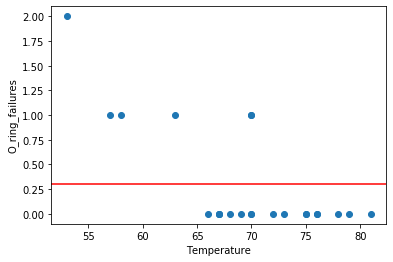

In [16]:
plt.plot(temp,O_ring_failures,'o')
plt.ylabel("O_ring_failures")
plt.xlabel("Temperature")
plt.axhline(mean_O_ring_failures, color='r', linestyle='-')
plt.show()

In [17]:
import statsmodels.api as sm
model=sm.OLS(O_ring_failures,temp).fit()

In [18]:
#Obtain model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        O_ring_failures   R-squared (uncentered):                   0.178
Model:                            OLS   Adj. R-squared (uncentered):              0.140
Method:                 Least Squares   F-statistic:                              4.755
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                      0.0402
Time:                        22:06:46   Log-Likelihood:                         -19.595
No. Observations:                  23   AIC:                                      41.19
Df Residuals:                      22   BIC:                                      42.33
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature     0.0038      0.002      2.181      0.040       0.000       0.007
==============================================================================
Omnibus:                       14.053   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.853
Skew:                           1.623   Prob(JB):                      0.00162
Kurtosis:                       4.696   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observation
As temeparture increases by 1 degree, O.ring.failures increase by 0.0038

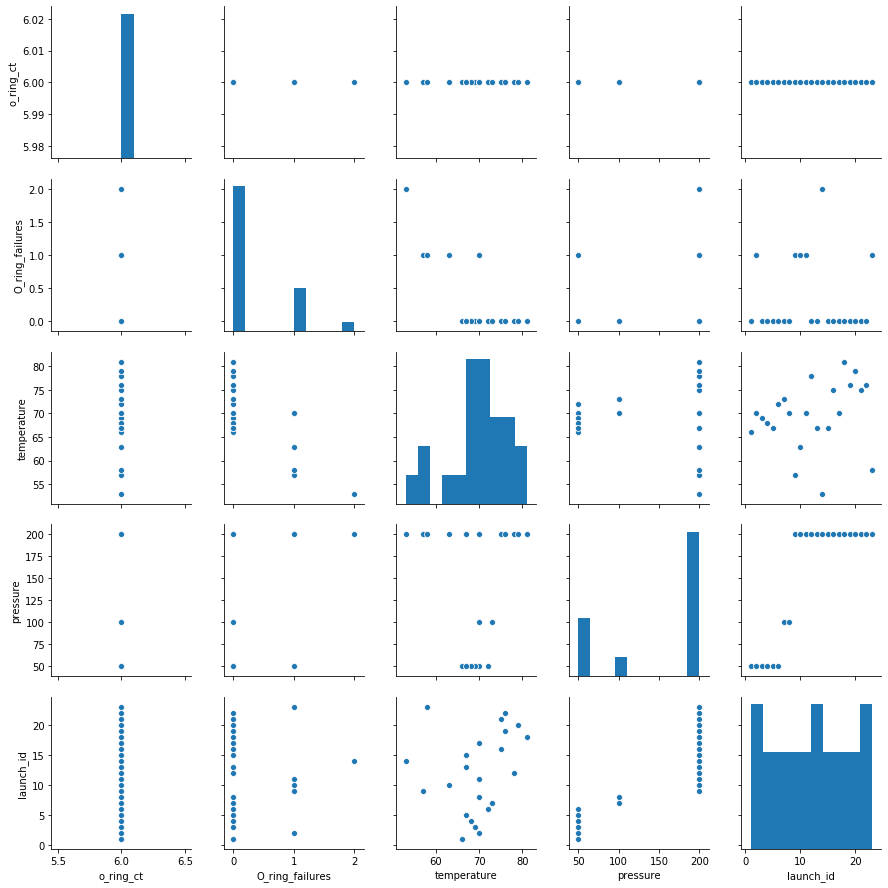

In [19]:
import seaborn as sns
sns.pairplot(challenger)

# Observations
1.The histogram on the diagonal allows us to see the distribution of a single variable
2.The scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

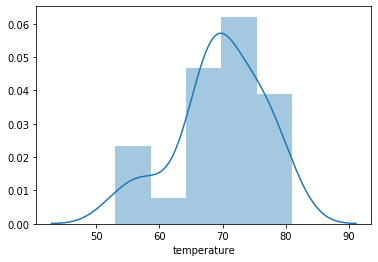

In [20]:
sns.distplot(challenger['temperature'])

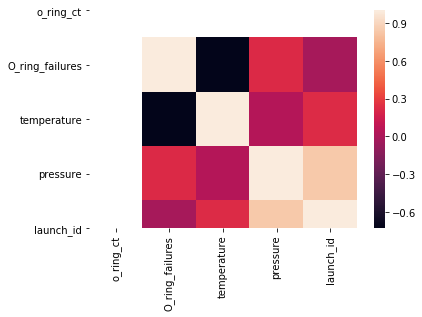

In [21]:
# Plot the correlation using heatmap
corr = challenger.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

# Observations
Black color represents negative correlation which exists betewen temeprature and O.ring.failures

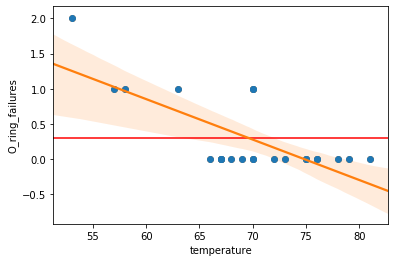

In [22]:
#Plot a regression line
plt.plot(temp,O_ring_failures,'o')
plt.ylabel("O_ring_failures")
plt.xlabel("Temperature")
plt.axhline(mean_O_ring_failures, color='r', linestyle='-')
sns.regplot(x='temperature', y='O_ring_failures', data=challenger)

In [23]:
#Split up the data into 'x' array that contains the features to train on and 'y' array with the target variable
X=challenger['temperature']
y=challenger['O_ring_failures']

In [24]:
X

0     66
1     70
2     69
3     68
4     67
5     72
6     73
7     70
8     57
9     63
10    70
11    78
12    67
13    53
14    67
15    75
16    70
17    81
18    76
19    79
20    75
21    76
22    58
Name: temperature, dtype: int64

In [25]:
y

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    2
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
Name: O_ring_failures, dtype: int64

In [26]:
# Split the data into Training set and Test set
from sklearn.model_selection import train_test_split  #train_test_split splits arrays or matrices into random train and test subsets. 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state =1) 
#random_state=some_number,guarantees that the output of Run 1 will be equal to the output of Run 2, 
# i.e. split will be always the same.

In [27]:
X_train

6     73
7     70
1     70
14    67
0     66
15    75
22    58
21    76
9     63
8     57
12    67
11    78
5     72
Name: temperature, dtype: int64

In [28]:
y_train

6     0
7     0
1     1
14    0
0     0
15    0
22    1
21    0
9     1
8     1
12    0
11    0
5     0
Name: O_ring_failures, dtype: int64

In [29]:
X_train = X_train.values.reshape((-1,1))

In [30]:
X_train

array([[73],
       [70],
       [70],
       [67],
       [66],
       [75],
       [58],
       [76],
       [63],
       [57],
       [67],
       [78],
       [72]], dtype=int64)

In [77]:
y_train

6     0
7     0
1     1
14    0
0     0
15    0
22    1
21    0
9     1
8     1
12    0
11    0
5     0
Name: O_ring_failures, dtype: int64

# Linear Regression with sklearn

In [32]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X_train,y_train) 

In [33]:
accuracy = model.score(X_train, y_train)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.49669252207783493


In [34]:
#Print coefficients
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 3.874282260501663
slope: [-0.05197945]


# Observation
The slope value -0.051 means that the predicted O.ring.failures reduces by -0.05 when x(temperature) rises by one degree

In [39]:
#Check model score
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
X_test

20    75
17    81
3     68
13    53
19    79
16    70
10    70
4     67
2     69
18    76
Name: temperature, dtype: int64

In [43]:
X_test = X_test.values.reshape((-1,1))

In [44]:
#Predictions from the model
predictions = model.predict(X_test)
print('predicted O.ring.failures:',predictions, sep = '\n')

predicted O.ring.failures:
[-0.02417649 -0.33605319  0.33967966  1.11937141 -0.23209429  0.23572076
  0.23572076  0.39165911  0.28770021 -0.07615594]


In [45]:
y_test

20    0
17    0
3     0
13    2
19    0
16    0
10    1
4     0
2     0
18    0
Name: O_ring_failures, dtype: int64

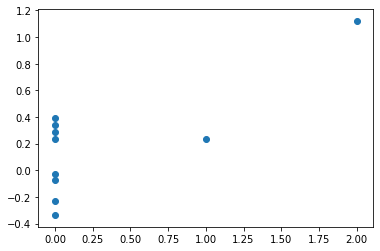

In [46]:
#Visualize the predictions
plt.scatter(y_test, predictions)

# Observations
A linear model has been obtained

In [47]:
#Other way for prediction
y_pred = model.intercept_ + model.coef_ * X_test
print('predicted response:', y_pred, sep='\n')

predicted response:
[[-0.02417649]
 [-0.33605319]
 [ 0.33967966]
 [ 1.11937141]
 [-0.23209429]
 [ 0.23572076]
 [ 0.23572076]
 [ 0.39165911]
 [ 0.28770021]
 [-0.07615594]]


In [48]:
#Define new data instance
Xnew = [[30]]

#Make a Prediction
ynew = model.predict(Xnew)

#Show the inputs and predicted outputs
print("New Temperature=%s, Predicted O.ring.failures=%s" % (Xnew,ynew))


New Temperature=[[30]], Predicted O.ring.failures=[2.31489876]


In [49]:
#Define new data instance
Xnew = [[70]]

#Make a Prediction
ynew = model.predict(Xnew)

#Show the inputs and predicted outputs
print("New Temperature=%s, Predicted O.ring.failures=%s" % (Xnew,ynew))

New Temperature=[[70]], Predicted O.ring.failures=[0.23572076]


In [50]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score
X_train = X_train.reshape(-1,1)
y_train_prediction = model.predict(X_train)

X_test = X_test.reshape(-1,1)
y_test_prediction = model.predict(X_test)

In [51]:
# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print("\n")

# model evaluation for training set
import numpy as np
rmse_training = (np.sqrt(mean_squared_error(y_train, y_train_prediction)))
r2_training = r2_score(y_train, y_train_prediction)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_training))
print('R2 score is {}'.format(r2_training))
print("\n")

# model evaluation for testing set
rmse_testing = (np.sqrt(mean_squared_error(y_test, y_test_prediction)))
r2_testing = r2_score(y_test, y_test_prediction)

print("The model performance for testing set")
print("--------------------------------------")
print('Root mean squared error: ', rmse_testing)
print('R2 score: ', r2_testing)

Slope: [-0.05197945]
Intercept: 3.874282260501663


The model performance for training set
--------------------------------------
RMSE is 0.3274346152282803
R2 score is 0.4966925220778349


The model performance for testing set
--------------------------------------
Root mean squared error:  0.440446139764291
R2 score:  0.5268468243091089


Text(0, 0.5, 'O_ring_failures')

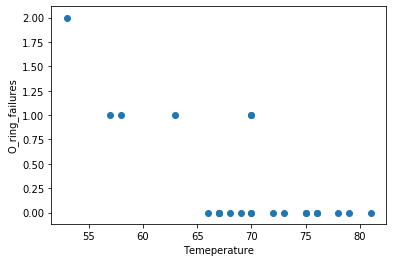

In [52]:
# plotting values
# data points
plt.scatter(X, y)
plt.xlabel('Temeperature')
plt.ylabel('O_ring_failures')

In [53]:
X= X.values.reshape(-1,1)
y_predicted = model.predict(X)

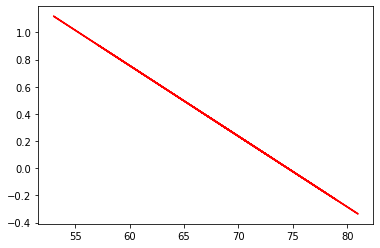

In [54]:
# predicted values
plt.plot(X, y_predicted, color='r')
plt.show()

# Multiple Linear Regression

In [55]:
X = challenger[["temperature", "pressure"]]
y = challenger["O_ring_failures"]

In [56]:
model1 = sm.OLS(y,X).fit()
predictions = model1.predict(X)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        O_ring_failures   R-squared (uncentered):                   0.292
Model:                            OLS   Adj. R-squared (uncentered):              0.225
Method:                 Least Squares   F-statistic:                              4.333
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                      0.0266
Time:                        22:08:32   Log-Likelihood:                         -17.873
No. Observations:                  23   AIC:                                      39.75
Df Residuals:                      21   BIC:                                      42.02
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature    -0.0030      0.004     -0.745      0.465      -0.011       0.005
pressure        0.0031      0.002      1.842      0.080      -0.000       0.007
==============================================================================
Omnibus:                        8.717   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.616
Skew:                           1.239   Prob(JB):                       0.0366
Kurtosis:                       3.871   Cond. No.                         6.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observation
1.This model has a higher R-squared compared to simple linear model against temperature and O.ring.failure
2.However in this model both temeprature and pressure features became statistcially insignificant to predict O.ring.failure
3.As pressure increases by 1 atmosphere, O.ring.failures increase by 0.0031 and as temperature increases by 1 degree, O.ring.failures decrease by -0.0030 

In [57]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state=1)

In [58]:
X_train

,temperature,pressure
6,73,100
7,70,100
1,70,50
14,67,200
0,66,50
15,75,200
22,58,200
21,76,200
9,63,200
8,57,200


In [59]:
y_train

6     0
7     0
1     1
14    0
0     0
15    0
22    1
21    0
9     1
8     1
12    0
11    0
5     0
Name: O_ring_failures, dtype: int64

In [60]:
# define the data/predictors as the pre-set feature names  
features = X_train.iloc[:,:].values

In [61]:
features

array([[ 73, 100],
       [ 70, 100],
       [ 70,  50],
       [ 67, 200],
       [ 66,  50],
       [ 75, 200],
       [ 58, 200],
       [ 76, 200],
       [ 63, 200],
       [ 57, 200],
       [ 67, 200],
       [ 78, 200],
       [ 72,  50]], dtype=int64)

In [62]:
labels = y_train.iloc[:].values

In [63]:
labels

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [64]:
X=features
y=labels

In [65]:
# Instantiate Multiple linear regrssion model
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X,y) 

In [66]:
predictions = model.predict(X)

In [67]:
#Check model accuracy
accuracy=model.score(X,y)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.4967625599627807


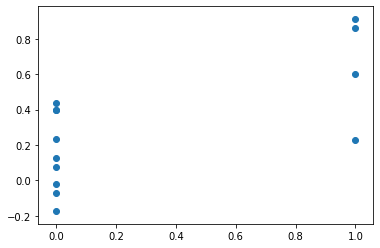

In [68]:
#Visualize the predictions
plt.scatter(y, predictions)

# Observation
With both temeprature and pressure the model is not linear

In [69]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score

# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print("\n")


import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)

print("The model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Slope: [-5.18729135e-02  6.02614157e-05]
Intercept: 3.857933005149098


The model performance
--------------------------------------
RMSE is 0.32741183231050536
R2 score is 0.4967625599627806




In [1]:
pre = challenger['pressure']

NameError: name 'challenger' is not defined

In [71]:
pre

0      50
1      50
2      50
3      50
4      50
5      50
6     100
7     100
8     200
9     200
10    200
11    200
12    200
13    200
14    200
15    200
16    200
17    200
18    200
19    200
20    200
21    200
22    200
Name: pressure, dtype: int64

Text(0.5, 0, 'pressure')

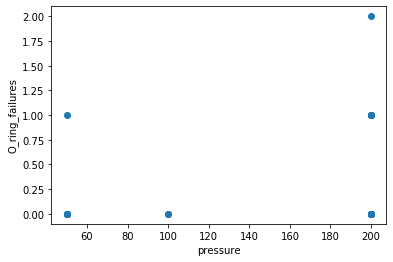

In [72]:
%matplotlib inline
plt.plot(pre,O_ring_failures,'o')
plt.ylabel("O_ring_failures")
plt.xlabel("pressure")

In [73]:
challenger.corr()

,o_ring_ct,O_ring_failures,temperature,pressure,launch_id
o_ring_ct,NaN,NaN,NaN,NaN,NaN
O_ring_failures,NaN,1.000000,-0.725671,0.220326,-0.011993
temperature,NaN,-0.725671,1.000000,0.039818,0.230770
pressure,NaN,0.220326,0.039818,1.000000,0.839932
launch_id,NaN,-0.011993,0.230770,0.839932,1.000000


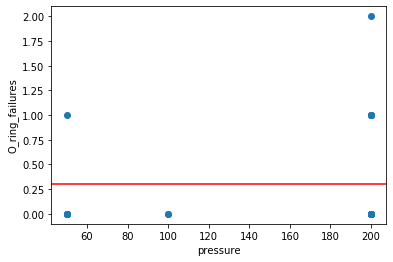

In [74]:
plt.plot(pre,O_ring_failures,'o')
plt.ylabel("O_ring_failures")
plt.xlabel("pressure")
plt.axhline(mean_O_ring_failures, color='r', linestyle='-')
plt.show()

In [75]:
import statsmodels.api as sm
model=sm.OLS(O_ring_failures,pre).fit()

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        O_ring_failures   R-squared (uncentered):                   0.273
Model:                            OLS   Adj. R-squared (uncentered):              0.240
Method:                 Least Squares   F-statistic:                              8.278
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                     0.00875
Time:                        22:09:08   Log-Likelihood:                         -18.173
No. Observations:                  23   AIC:                                      38.35
Df Residuals:                      22   BIC:                                      39.48
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pressure       0.0020      0.001      2.877      0.009       0.001       0.003
==============================================================================
Omnibus:                       11.553   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.660
Skew:                           1.447   Prob(JB):                      0.00799
Kurtosis:                       4.306   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""